#### Part A: Baseline Model and Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
import warnings
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_fscore_support
from imblearn.under_sampling import ClusterCentroids
from collections import Counter



In [2]:
# loading the dataset
df = pd.read_csv('creditcard.csv')

# print atble
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* The dataset creditcard consists of 31 columns, and the vairables v1-v28 are the pca columns and time, amount and class are the only normal variables.

In [3]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


* There are some redflags here, such as time has co-relationship with some of the pca columns fairly which might affect during oversampling or logistic regression baically linearly combine the features.

Class
0    284315
1       492
Name: count, dtype: int64


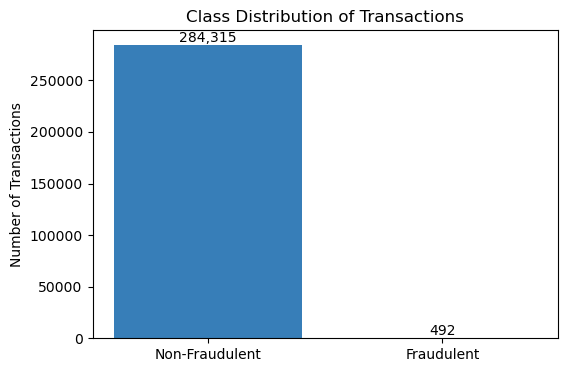

the above plot shows us the Imbalance ratio of Non-Fraudulent to Fraudulent classes and the ration) is 577 : 1


In [4]:

# fraud vs not fraud counts, frauds = 1 and non frand is 0
class_counts = df['Class'].value_counts()
print(class_counts)

# plotting bar plot
plt.figure(figsize=(6,4))
plt.bar(['Non-Fraudulent', 'Fraudulent'], class_counts, color=['#377eb8', '#e41a1c'])
#y label
plt.ylabel('Number of Transactions')
#title
plt.title('Class Distribution of Transactions')

#dispalying count
plt.text(0, class_counts[0], f'{class_counts[0]:,}', ha='center', va='bottom')
plt.text(1, class_counts[1], f'{class_counts[1]:,}', ha='center', va='bottom')
plt.show()


# 
print(f"the above plot shows us the Imbalance ratio of Non-Fraudulent to Fraudulent classes and the ration) is {int(class_counts[0] / class_counts[1])} : 1")


In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

# Stratified split to preserve class distribution in both train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

#### Maintenance of imbalance in train and test because of stratify.

In [6]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Check class distribution in train and test
print(f"\nTraining set class distribution:")
train_class_dist = y_train.value_counts()
print(train_class_dist)
print(f"Fraud percentage in training: {(train_class_dist[1]/len(y_train))*100:.3f}%")


print(f"\nTest set class distribution:")
test_class_dist = y_test.value_counts()
print(test_class_dist)
print(f"Fraud percentage in test: {(test_class_dist[1]/len(y_test))*100:.3f}%")

Training set shape: (213605, 30)
Test set shape: (71202, 30)

Training set class distribution:
Class
0    213236
1       369
Name: count, dtype: int64
Fraud percentage in training: 0.173%

Test set class distribution:
Class
0    71079
1      123
Name: count, dtype: int64
Fraud percentage in test: 0.173%


#### Training baseline model and performance metrics on test data

In [7]:
# Training with logistic regressoin
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
#logistic model prediction on test data
y_pred = model.predict(X_test)

#confusion matrix for all metrics
print(confusion_matrix(y_test, y_pred))

report = classification_report(y_test, y_pred)
print(report)


[[71050    29]
 [   46    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.73      0.63      0.67       123

    accuracy                           1.00     71202
   macro avg       0.86      0.81      0.84     71202
weighted avg       1.00      1.00      1.00     71202



- As we know logistic regression is best at testing pca as per assignment-2, the pca columns in this dataset along with amount made logistic regression 100 percent accurate in learning about non fradulent data, and did moderately well in fradulent predictions in terms of precision and recall score, as we know from bar chart, the fradulent transcations are low in 1/577, so he model is not able to learn from the data accurately.

#### Part B: Gaussian Mixture Model (GMM) for Synthetic Sampling 



####  SMOTE: Simple Interpolation-Based Sampling

- SMOTE generates synthetic samples by linearly interpolating between a data point and its nearest neighbors.
- It assumes that the minority class present inside the decision bounary therefore genreating a lot of noise, therefore failing to find complex structures.
---

#### GMM-Based Sampling:
- This method fits a GMM to minority class, and then considers its as a combination of guassian distributions basically mulitple clusters.

- It assumens that each cluster in minorty will follow differnt gguassian distribution, and with that it might capture non linear and complex relationship. So after the guassian finds the guassian distributions/components, it will generate samples from each distribution, which will preserve both local density and structure. 

#### Why GMM Is Theoretically Superior
* It was able to capture different clusters, and each guassian component for each cluster, and unlike smote which will consider all clusters as one and missing complex relations of a cluster.

* As we sample within cluster, we avoid sparse regions near decision boundaries which wil generate noise.

* Each Gaussian component estimates the probability distribution params like mean and covariance of a cluster within the minority class. By sampling from these fitted Gaussian distributions, GMM generates synthetic samples that naturally follow the cluster’s shape and density. This ensures that new samples reflect the real underlying distribution of each sub-group, rather simple linear interpolation like SMOTE.
---



#### GMM Implementation [10]: 

### GMM Fitting and Component Selection

To model the minority class, we fit a Gaussian Mixture Model (GMM) using only the fraudulent samples from the training data, this was done to capture the minority cluster complex patterns which SMOTE might miss. 

To choose the optimal number of components (clusters), we tested GMMs with different values of K  ranging from 1 to 30. For each model, we calculated  BIC scores, which balances model fit with complexity which is basically penalty, model with lowest bic will be better for k components.




Minority class samples: 369


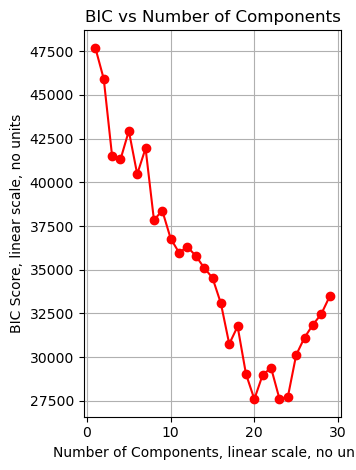

Optimal number of components is: 20


In [9]:
#dividing minorty data seperately for GMM sampling
minority_data = X_train[y_train == 1]
print(f"Minority class samples: {len(minority_data)}")

# Test different number of components
n_components_range = range(1, 30)  #we are trying to test 30, just to see the lowest point lowest bic
bic_scores = []


# lets test all 30 components, and gmm gives the bic score  fitted on the minorit data.
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(minority_data)
    bic_scores.append(gmm.bic(minority_data))

# Plot BIC scores using bic from gmm fit
plt.subplot(1, 2, 2)
plt.plot(n_components_range, bic_scores, 'r-o', label='BIC')
plt.xlabel('Number of Components, linear scale, no units')
plt.ylabel('BIC Score, linear scale, no units')
plt.title('BIC vs Number of Components')
plt.grid(True)
plt.tight_layout()
plt.show()

# lowest bic in graoh has best penalty.
optimal_components = n_components_range[np.argmin(bic_scores)]
print(f"Optimal number of components is: {optimal_components}")


In [10]:
# Fiting lGMM with optimal components
gmm_final = GaussianMixture(n_components=optimal_components, random_state=42)
gmm_final.fit(minority_data)
print(f"GMM fitted with {optimal_components} components")

GMM fitted with 20 components


#### Synthetic Data Generation [10]: 

In [11]:
# we have 369 minority samples, we need to calclate how many remaining we needed
majority_count = len(y_train[y_train == 0])
minority_count = len(y_train[y_train == 1])
samples_needed = majority_count - minority_count
print(f"Synthetic samples count needed to match the majority is: {samples_needed}")



# Generateing synthetic samples from GMM
synthetic_samples = gmm_final.sample(samples_needed)[0] # this is for sampless 0 gvies us the samples
print(f"\nGenerated {len(synthetic_samples)} synthetic samples")


# making the balanced data  set, by adding this gmm generated samples to balance the dataset
X_minority_balanced = np.vstack([minority_data, synthetic_samples])
y_minority_balanced = np.ones(len(X_minority_balanced))

print(f"\nTotal minority samples before and after generation are : {len(y_train[y_train == 1])}, {len(X_minority_balanced)}")

Synthetic samples count needed to match the majority is: 212867

Generated 212867 synthetic samples

Total minority samples before and after generation are : 369, 213236


### Process of Sampling from a GMM and Combining with Training Data
* first we need to Fit GMM to minority class data.
  - Once it fits the data, so each cluster/group have specific guassian component with it's own mean and variance, each component has different weights based on the minority dataset.

  - Based on the weight of the component, the datapoint is selected from thar component, soin this was the proportion of distribution of clusters is maintained, then using these samples, we balance the original dataset, which will still adhere to cluster structure in minority.


#### Rebalancing with CBU to some level and then using gmm to oversample to match [10]:

In [12]:
 #Use CBU to reduce majority class to a smaller size
target_size = 15000  # using 15000, for time constraints, 1 lakh did too long.

cbu = ClusterCentroids(
    sampling_strategy={0: target_size}, 
    random_state=42
)

# Apply CBU to get reduced majority class
X_cbu_temp, y_cbu_temp = cbu.fit_resample(X_train, y_train)
X_majority_reduced = X_cbu_temp[y_cbu_temp == 0]
print(f"Majority class after CBU: {len(X_majority_reduced)} samples")

#----------------------------------------------------------
# Now we have 15000 non frauds got reduced from 200K+, and 369 frauds, now we will use guassian samples to make 369 to 15k to balance teh dataset.

original_minority_count = len(minority_data)  # 369
additional_needed = target_size - original_minority_count  # 10000 - 369 

print(f"\n\nAdditional synthetic samples needed: {additional_needed}")

# Generate additional synthetic minority samples using GMM
synthetic_minority_additional = gmm_final.sample(additional_needed)[0]

# merging the minorty generated with old minority
X_minority_combined = np.vstack([minority_data, synthetic_minority_additional])
y_minority_combined = np.ones(target_size)

# adding them back to the majoirty dataset 15k + 15k 30k datapoints.
X_balanced_small = np.vstack([X_majority_reduced, X_minority_combined])
y_balanced_small = np.hstack([np.zeros(target_size), y_minority_combined])

print(f"\n\nFinal minority samples: {len(X_minority_combined)} (369 original + {additional_needed} synthetic)")
print(f"\ncbu and gmm together balanced dataset: {Counter(y_balanced_small)}")
print(f"\nTotal samples in Version 2: {len(X_balanced_small)}")

Majority class after CBU: 15000 samples


Additional synthetic samples needed: 14631


Final minority samples: 15000 (369 original + 14631 synthetic)

cbu and gmm together balanced dataset: Counter({np.float64(0.0): 15000, np.float64(1.0): 15000})

Total samples in Version 2: 30000


In [13]:

# ONLY GMM BALANCED DATASET, ADDING THE MINORITY BACK WITH MAJORITY SAMPLES
X_balanced_gmm = np.vstack([X_train[y_train == 0], X_minority_balanced])
y_balanced_gmm = np.hstack([y_train[y_train == 0], y_minority_balanced])

# CBU AND GMM BOTH BALANCED
X_balanced_cbu_gmm = X_balanced_small
y_balanced_cbu_gmm = y_balanced_small

print(f"GMM balanced dataset: {Counter(y_balanced_gmm)}")
print(f"\n CBU balanced dataset: {Counter(y_balanced_cbu_gmm)}")

GMM balanced dataset: Counter({np.float64(0.0): 213236, np.float64(1.0): 213236})

 CBU balanced dataset: Counter({np.float64(0.0): 15000, np.float64(1.0): 15000})


#### Part C: Performance Evaluation

In [14]:
# Train models on both balanced datasets gmm and cbu+gmm

# fitting  logisic regression to GMM balanced dataset
model_gmm = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
model_gmm.fit(X_balanced_gmm, y_balanced_gmm)

#fitting logistic regression to  GMM+CBU balanced dataset
model_cbu_gmm = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
model_cbu_gmm.fit(X_balanced_cbu_gmm, y_balanced_cbu_gmm)


# Predictions for all the models on the original test dataste
y_pred_baseline = model.predict(X_test) #baseline prediction
y_pred_gmm = model_gmm.predict(X_test) #gmm balanced prediction
y_pred_cbu_gmm = model_cbu_gmm.predict(X_test) #gmm_cbu balanced prediction



/home/venka/anaconda3/envs/dsenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/venka/anaconda3/envs/dsenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#### Comparative Analysis 


Model Comparison Table:
                   Model  Precision  Recall  F1-Score
0  Baseline (Imbalanced)     0.7264  0.6260    0.6725
1                    GMM     0.0736  0.8862    0.1359
2                GMM_CBU     0.0291  0.8862    0.0564


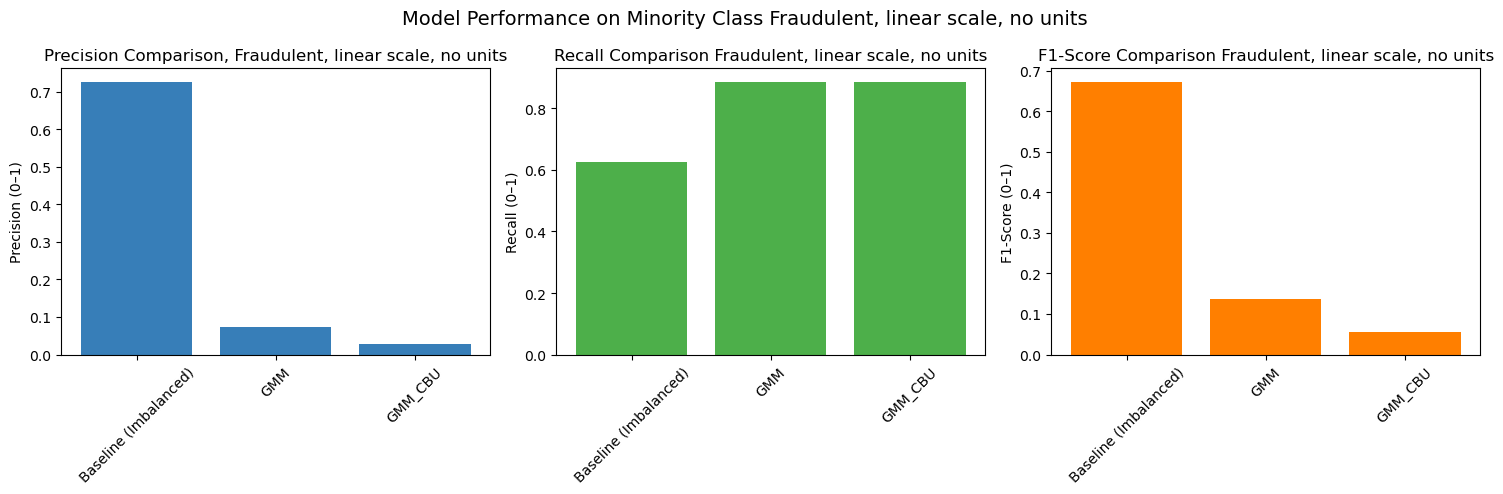

In [15]:
# Define models and predictions
models = ['Baseline (Imbalanced)', 'GMM', 'GMM_CBU']
predictions = [y_pred_baseline, y_pred_gmm, y_pred_cbu_gmm] 
results = []

# Extract metrics for minority class (label=1)
for model_name, pred in zip(models, predictions):
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, pred, labels=[1])
    results.append({
        'Model': model_name,
        'Precision': precision[0],
        'Recall': recall[0],
        'F1-Score': f1[0]
    })

# Create comparison DataFrame
comparison_df = pd.DataFrame(results)
print("\nModel Comparison Table:")
print(comparison_df.round(4))

# Visualization (Colorblind-friendly colors)
colors = ['#377eb8', '#4daf4a', '#ff7f00']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Precision
axes[0].bar(comparison_df['Model'], comparison_df['Precision'], color=colors[0])
axes[0].set_title('Precision Comparison, Fraudulent, linear scale, no units', fontsize=12)
axes[0].set_ylabel('Precision (0–1)', fontsize=10)
axes[0].tick_params(axis='x', rotation=45)

# Recall
axes[1].bar(comparison_df['Model'], comparison_df['Recall'], color=colors[1])
axes[1].set_title('Recall Comparison Fraudulent, linear scale, no units', fontsize=12)
axes[1].set_ylabel('Recall (0–1)', fontsize=10)
axes[1].tick_params(axis='x', rotation=45)

# F1-Score
axes[2].bar(comparison_df['Model'], comparison_df['F1-Score'], color=colors[2])
axes[2].set_title('F1-Score Comparison Fraudulent, linear scale, no units', fontsize=12)
axes[2].set_ylabel('F1-Score (0–1)', fontsize=10)
axes[2].tick_params(axis='x', rotation=45)

# Subtitle and layout
fig.suptitle('Model Performance on Minority Class Fraudulent, linear scale, no units', fontsize=14)
plt.tight_layout()
plt.show()





### Impact of GMM-Based Oversampling.

Looking at the stats above, GMM is able to improve recall score even better than baseline 0.062 to 0.88, which tells us that this it is able to find the fradulent transactions, but just like in assignment 3[1] CBO and CBU, the precision dropped very low,which is because there were many false positives... the amouth of actual fraud transactions detected is very less here.

GMM+CBU has also got high recall score, but the precision score is even lower than GMM, this is because of sampling down the majority, and for some reason that is being recognized as false positive more than earlier. Because of this F1 score for this gmm+cbu is the lowest.

---


### Final Recommendation
As we can see the plot above, it's evident from F_1 score that GMM is better  than GMM+CBU, but from ASSIGNMENT-3[1] results, it can be see that CBO performace is better than GMM results here cbo got F1  score of  0.1941, and gmm got f1 score of 0.1359.

From the analysis it is understandable that the GMM with high recall score is able to find he fradulent ones, which clearly tells that this is doing it's job, but the precision is hurting the entire result which is the reason for low F1 score 0.0546. 

Reasons for this low precision: 
- WE know we have pca columsn only which capture maximum variance, Additionally, the **Time** and **Amount** columns are not PCA-transformed and show **little correlation** with some PCA features, so this might also add up as as reason for guassian to underperform as it assumes guassian structure across all features??
- LR is for linear combination, so this introduction of new data to balance dataset might have introduced non linear relationship between the features.


Finally, my outcome is that the GMM is performing well to detect frauds, but the precision score is very low, but it might be due to the corelation  between the datapoints other than pca columns. Out of two, GMM is performing better than GMM+CBO and both are performing less than CBO from assignment 3 result whicc has f1 score 0.1941, and followed by GMM 0.1359 followed by GMM+CBU 0.0546, and last by CBU from assignment_3[1] whch has around 0.052331.


Interestingly, GMM+CBU overperformed CBU from assignment-3[1] by a minor margin.

  

[1] - https://github.com/da25c023-Venkataprakash/assignment-3-da25c023-Venkataprakash